In [97]:
import numpy as np
from scipy.integrate import solve_ivp, odeint
import sympy as sy
import handcalcs.render
import matplotlib.pyplot as plt

In [98]:
from scipy import signal
import sympy as sy

sy.init_printing()  # LaTeX like pretty printing for IPython
s = sy.Symbol('s')


def lti_to_sympy(lsys, symplify=True):
    """ Convert Scipy's LTI instance to Sympy expression """
    s = sy.Symbol('s')
    G = sy.Poly(lsys.num, s) / sy.Poly(lsys.den, s)
    return sy.simplify(G) if symplify else G


def sympy_to_lti(xpr, s=sy.Symbol('s')):
    """ Convert Sympy transfer function polynomial to Scipy LTI """
    num, den = sy.simplify(xpr).as_numer_denom()  # expressions
    p_num_den = sy.poly(num, s), sy.poly(den, s)  # polynomials
    c_num_den = [sy.Poly(p).all_coeffs() for p in p_num_den]  # coefficients
    l_num, l_den = [sy.lambdify((), c)() for c in c_num_den]  # convert to floats
    return signal.lti(l_num, l_den)


pG, pH, pGH, pIGH = sy.symbols("G, H, GH, IGH")  # only needed for displaying


## Time domain decription of dynamics of a system

\begin{align}\label{eq:sysODE}
a_nx^{n} + a_{n-1}x^{n-1}+ \cdots + a_1\dot{x} + a_0x =& \\
 & b_my^{m} + b_{m-1}y^{m-1} + \cdots + b_1\dot{y} + b_0y   
\end{align}

where 
$$m \le n$$
means the index of the output is less than that of input




### Transfer function 

Tasking Laplace transfrom of the above time domain equation we get 

\begin{align}
(s^na_n+ s^{n-1}a_{n-1}+ \cdots + sa_1 + a_0)x(s) &= (s^mb_m + s^{m-1}b_{m-1} + \cdots + sb_1 + b_0)y(s)\\
\frac{x(s)}{y(s)} &= \frac{(s^mb_m +  s^{m-1}b_{m-1}+ \cdots + sb_1 + b_0)}{(s^na_n+ + s^{n-1}a_{n-1} \cdots + sa_1 + a_0)}
\end{align}

### First order system
\begin{align}
a_1\dot{x} + a_0x &= b_0y   
\end{align}

Taking Laplace transform, we get 

$$a_1sx(s) + a_0x(s) =  b_0y(s)$$
Therefore the output to input ratio is 

$$\frac{x(s)}{y(s)} = \frac{b_0}{(sa_1 + a_0)}$$


For steady state, $d/dt = 0$. Hence from differential equation we get 

\begin{align}
a_1\dot{x} + a_0x &= b_0y   \\
a_0x &= b_0y
\end{align}
Taking Laplace transforms, we get 

$$k_{p} = \frac{b_0}{a_0}$$



### First order step response

In [99]:
# First order
kp = 1.0 
T1 = 0.3
num1 = np.array([kp])
den1 = np.array([T1 , 1.0])
F1 = signal.lti(num1,den1)

In [100]:
#Step resonse
ts = np.arange(0,2,0.01)
y1 = signal.lti.step(F1, T = ts)

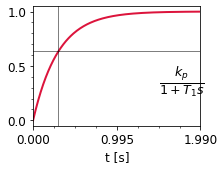

In [102]:
plt.figure(101,figsize = (3,2.2))
plt.rc('font', size = 12)
plt.plot(y1[0],y1[1], c = 'crimson', lw =2)
plt.xlim(y1[0][0],y1[0][-1])
plt.xticks(np.linspace(y1[0][0],y1[0][-1],3))
plt.minorticks_on()
plt.axvline(T1, c='k', lw = 0.5)
plt.axhline(0.636, c = 'k', lw = 0.5)
plt.xlabel('t [s]')
plt.text(1.5,0.3,r"$\frac{k_p}{1 + T_1s}$",fontsize = 18)
plt.grid()
plt.grid()
# plt.savefig(dirfig2 + 'PT1step.pdf', bbox_inches = 'tight', transparent = True)
plt.show()

### Second Order System

In [103]:
#Second order
kp = 1
D = 0.45
wn = 1
num2 = np.array([kp])
den2 = np.array([1/wn**2, 2*D/wn, 1])
F2 = signal.lti(num2,den2)

In [104]:
y2 = signal.lti.step(F2)

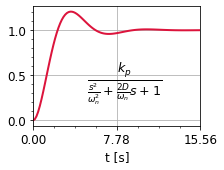

In [105]:
plt.figure(102,figsize = (3,2.2))
plt.rc('font', size = 12)
plt.plot(y2[0],y2[1], c = 'crimson', lw =2)
plt.xlim(y2[0][0],y2[0][-1])
plt.xticks(np.linspace(y2[0][0],y2[0][-1],3))
plt.minorticks_on()
# plt.axvline(0.5, c='k', lw = 0.5)
# plt.axhline(0.636, c = 'k', lw = 0.5)
plt.xlabel('t [s]')
plt.text(5,0.4,r"$\frac{k_p}{\frac{s^2}{\omega^2_n} + \frac{2D}{\omega_n}s + 1}$",fontsize = 18)
plt.grid()
# plt.savefig(dirfig2 + 'PT2step.pdf', bbox_inches = 'tight', transparent = True)
plt.show()

### Differential + low pass DT1

In [106]:
#DT1
Kd = 1
T1 = 0.5
numdt1 = np.array([Kd,0])
dendt1 = np.array([T1,1])
FDT1 = signal.lti(numdt1,dendt1)

In [107]:
ydt1 = signal.lti.step(FDT1)

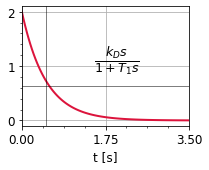

In [108]:
plt.figure(103,figsize = (3,2.2))
plt.rc('font', size = 12)
plt.plot(ydt1[0],ydt1[1], c = 'crimson', lw =2)
plt.xlim(ydt1[0][0],ydt1[0][-1])
plt.xticks(np.linspace(ydt1[0][0],ydt1[0][-1],3))
plt.minorticks_on()
plt.axvline(0.5, c='k', lw = 0.5)
plt.axhline(0.636, c = 'k', lw = 0.5)
plt.xlabel('t [s]')
plt.text(1.5,1,r"$\frac{k_Ds}{1 + T_1s}$",fontsize = 18)
plt.grid()
# plt.savefig(dirfig2 + 'DT1step.pdf', bbox_inches = 'tight', transparent = True)
plt.show()

## Lag - lead system PDT1

In [109]:
Kd = 1
T1 = 0.5
Td = 1.0
Td2 = 0.25
numpdt1 = np.array([Kd*Td,Kd])
numpdt2 = np.array([Kd*Td2,Kd])
denpdt1 = np.array([T1,1])
FPDT1 = signal.lti(numpdt1,denpdt1)
FPDT2 = signal.lti(numpdt2,denpdt1)

In [110]:
ypdt1 = signal.lti.step(FPDT1)
ypdt2 = signal.lti.step(FPDT2)

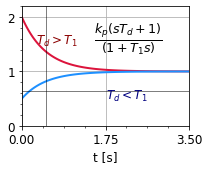

In [111]:
plt.figure(113,figsize = (3,2.2))
tfont = {'color' : 'navy'}
tfont2 = {'color' : 'darkred'}
plt.rc('font', size = 12)
plt.plot(ypdt1[0],ypdt1[1], c = 'crimson', lw =2)
plt.plot(ypdt2[0],ypdt2[1], c = 'dodgerblue', lw =2)
plt.xlim(ypdt1[0][0],ypdt1[0][-1])
plt.xticks(np.linspace(ypdt1[0][0],ypdt1[0][-1],3))
plt.minorticks_on()
plt.axvline(0.5, c='k', lw = 0.5)
plt.axhline(0.636, c = 'k', lw = 0.5)
plt.ylim(0,2.2)
plt.xlabel('t [s]')
plt.text(1.5,1.5,r"$\frac{k_p(sT_d + 1)}{(1 + T_1s)}$",fontsize = 18)
plt.text(1.75,0.5, "$T_d < T_1$", fontdict = tfont)
plt.text(0.3,1.5, "$T_d > T_1$", fontdict = tfont2)
plt.grid()
# plt.savefig(dirfig2 + 'PDT1step.pdf', bbox_inches = 'tight', transparent = True)
plt.show()

## PI block

In [112]:
#PI block
Kp = 1.0
Ti = 10.0
numPI = Kp*np.array([Ti,1])
denPI = np.array([Ti,0])
Fpi = signal.lti(numPI,denPI)

In [113]:
ypi = signal.lti.step(Fpi)

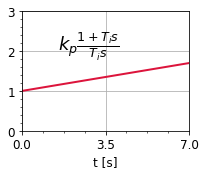

In [114]:
plt.figure(104,figsize = (3,2.2))
plt.rc('font', size = 12)
plt.plot(ypi[0],ypi[1], c = 'crimson', lw =2)
plt.xlim(ypi[0][0],ypi[0][-1])
plt.ylim(0,3)
plt.xticks(np.linspace(ypi[0][0],ypi[0][-1],3))
plt.minorticks_on()
# plt.axvline(0.5, c='k', lw = 0.5)
# plt.axhline(0.636, c = 'k', lw = 0.5)
plt.xlabel('t [s]')
plt.text(1.5,2,r"$k_p\frac{1+ T_is}{T_is}$",fontsize = 18)
plt.grid()
# plt.savefig(dirfig2+ 'PIstep.pdf', bbox_inches = 'tight', transparent = True)
plt.show()

## Integrator block

In [115]:
#I Controller
Kp = 1.0
Ti = 5.0
numI = np.array([1])
denI = np.array([Ti,0])
Fi = signal.lti(numI,denI)

In [116]:
yi = signal.lti.step(Fi)

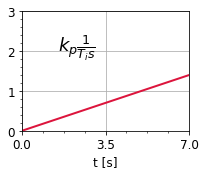

In [117]:
plt.figure(106,figsize = (3,2.2))
plt.rc('font', size = 12)
plt.plot(yi[0],yi[1], c = 'crimson', lw =2)
plt.xlim(yi[0][0],yi[0][-1])
plt.ylim(0,3)
plt.xticks(np.linspace(yi[0][0],yi[0][-1],3))
plt.minorticks_on()
# plt.axvline(0.5, c='k', lw = 0.5)
# plt.axhline(0.636, c = 'k', lw = 0.5)
plt.xlabel('t [s]')
plt.text(1.5,2,r"$k_p\frac{1}{T_is}$",fontsize = 18)
plt.grid()
# plt.savefig(dirfig2+ 'Istep.pdf', bbox_inches = 'tight', transparent = True)
plt.show()

## Second order system with changing damping

In [118]:
kp = 1.0
D = 0.5
w_n = 40
denPT2 = np.array([1, 2*D*wn, wn**2])
numPT2 = np.array([1])
PT2 = signal.lti(numPT2,denPT2)
d = [0.1,0.25,0.5,0.707,1.0]
tx = np.arange(0,20,0.01)
ypt2 =  signal.lti.step(PT2, T= tx)
print(np.shape(ypt2))

(2, 2000)


In [119]:
ypt2x = np.zeros((len(d),2,len(tx)))
for ii,dn in enumerate(d):
    PT2x = signal.lti(1, [1, 2*dn*wn, wn**2])
    ypt2x[ii,:] = signal.lti.step(PT2x, T= tx)

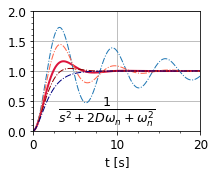

In [120]:
import matplotlib.patches as patches

plt.figure(107,figsize = (3,2.2))
plt.rc('font', size = 12)
plt.plot(ypt2[0],ypt2[1], c = 'crimson', lw =2)
plt.plot(ypt2x[0,0],ypt2x[0,1],ls = "-.", lw =1)
plt.plot(ypt2x[1,0],ypt2x[1,1],ls = "-.", c = 'tomato',lw =1)
plt.plot(ypt2x[3,0],ypt2x[3,1],ls = "-.", c = 'darkred',lw =1)
plt.plot(ypt2x[4,0],ypt2x[4,1],ls = "-.", c = 'navy',lw =1)
plt.xlim(ypt2[0][0],ypt2[0][-1])
plt.ylim(0,2.0)
plt.xticks(np.linspace(ypt2[0][0],ypt2[0][-1],3))
plt.minorticks_on()
# plt.arrow(1.0,1.8,2.8,-1.0, fc ='k', ec = 'k', length_includes_head = True, head_width = 0.5, head_length = 0.8)
# plt.axvline(0.5, c='k', lw = 0.5)
# plt.axhline(0.636, c = 'k', lw = 0.5)
plt.xlabel('t [s]')
plt.text(3,0.3,r"$\frac{1}{s^2 + 2D\omega_n + \omega^2_n}$",fontsize = 18)
plt.grid()
# plt.savefig(dirfig2+ 'PT2step.pdf', bbox_inches = 'tight', transparent = True)
plt.show()

## Setting of controller

In [121]:
#Second order
kp = 1
D2 = 1.7
wn = 1
num22 = np.array([kp])
den22 = np.array([1/wn**2, 2*D2/wn, 3,1])
F22 = signal.lti(num22,den22)
z22,p22,k22 = signal.tf2zpk(num22,den22)
print(p22)

[-2.27420702+0.j         -0.56289649+0.35051569j -0.56289649-0.35051569j]


In [122]:
T_g = 3.4
T_u = 0.9
k_ps = 1.0
tx = np.arange(0,50,0.001)
sh = signal.lti(num22,den22)
kpp = T_g/(T_u*k_ps)
PInum = np.array([3.0*T_u,1])
PIden = np.array([3.0*T_u,0])
PIreg = signal.lti(0.42*kpp*PInum,PIden)

Gsh = lti_to_sympy(sh)
GPIreg = lti_to_sympy(PIreg)
GPIol = Gsh*GPIreg
GPIcl = GPIol/(1+GPIol)
FcPIreg = sympy_to_lti(GPIcl)

ypireg = signal.lti.step(FcPIreg, T = tx)

In [123]:
y22 = signal.lti.step(F22)

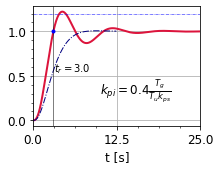

In [124]:
plt.figure(107,figsize = (3,2.2))
plt.rc('font', size = 12)
yend = 25
plt.plot(ypireg[0],ypireg[1], c = 'crimson', lw =2)
plt.plot(y22[0],y22[1],ls = "-.", c= 'navy', lw =1)
plt.xlim(ypireg[0][0],yend)
# plt.ylim(0,3)
plt.xticks(np.linspace(ypireg[0][0],yend,3))
plt.minorticks_on()
plt.axvline(3.01, c='k', lw = 0.5)
plt.axhline(1.2,ls= '-.', c = 'b', lw = 0.5)
plt.plot(3.01,1.0,'b.')
plt.xlabel('t [s]')
plt.text(10,0.3,r'$k_{pi} = 0.4\frac{T_g}{T_uk_{ps}}$')
plt.text(3.1,0.55,r"$t_r = 3.0$",fontsize = 10)
# plt.savefig(dirfig2 + 'PIstepclkp2.pdf', bbox_inches = 'tight', transparent = True)
plt.grid()

## Frequency response

In [125]:
kp = 1.0
D = 0.1
w_n = 40
denPT2 = np.array([1, 2*D*wn, wn**2])
numPT2 = np.array([1])
PT2 = signal.lti(numPT2,denPT2)

In [126]:
w,H = signal.freqresp(PT2)

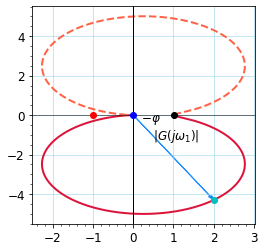

In [127]:
plt.figure(2002, figsize = (4,4))
plt.rc('font', size = 12)
plt.plot(H.real, H.imag, "crimson", lw =2)
plt.plot(H.real, -H.imag, ls = '--',c= "tomato", lw =2)
plt.minorticks_on()
plt.grid(which = 'major', c= 'skyblue', lw = 0.5)
plt.axvline(0,c = 'k', lw = 1)
plt.axhline(0,c = 'k', lw = 0.5)
plt.plot(-1,0, 'ro')
plt.plot(H.real[0],H.imag[0], 'ko')
plt.plot(H.real[-1],H.imag[-1], 'bo')
plt.arrow(0,0, 2.0,-4.3, ec = 'dodgerblue', lw= 1.0, length_includes_head = True, head_width = 0.1, head_length = 0.2)
plt.plot(2.0,-4.3,'co')
plt.text(0.5,-1.2, "$|G(j\omega_1)|$")
plt.text(0.2,-0.3,r"$-\varphi$")
# plt.savefig(dirfig2 + "FrequencyOrtskuve.pdf", bbox_inches = 'tight', transparent = True)
# plt.savefig(dirfig2E + "FrequencyOrtskuve.pdf", bbox_inches = 'tight', transparent = True)
plt.show()

## Control of DC motors
### Define parameters of the motor

In [128]:
#Normalization of Sep Excited DC machine parameters
Pr = 22e3 #Watts Nominal power
Var = 400.0  #Nominal Voltage
Iar = 54.0 #Nominal Current
Nr = 3000.0 #rpm
Ra = 0.2178 #ohm
La = 3.4e-3 #H
J = 243.63 #kgm^2
#angular scale
wr = 2*np.pi*3000/60.0

## Normalization

In [129]:
mr = Var*Iar/wr
Isc = Var/Ra
Msc = mr*Isc/Iar
ra = Ra*Iar/Var
la = wr*La*Iar/Var
ta = la/ra
tj = J*wr/mr #calculation of the inertial time constant
tm = ra*tj   
print(ra,la, ta, mr, tm, tj)
# print(Isc, Iar)
#New machine definition
#ra normalize
#Ta = La/Ra
#Tj = seconds
mach_DCnew = {'ra':0.0294,'la':la, 'Ta' : ta, 'Tj':tj}

0.029403 0.1441991027997715 4.904230956017124 68.75493541569878 32.731688041731616 1113.2091297395373


In [130]:
%%render 
V_ar = 400.0#V
I_ar = 54#A
R_a = 0.2178 #ohm
Z_b = V_ar/I_ar#ohms
r_a = R_a/Z_b

<IPython.core.display.Latex object>

In [131]:
#normalized parameters of a DC machines
mach_DC = {'ra': 0.0294, 'la':0.1442,'tj': 199.755  } #dictionary 
mach_DCss = {'ra': 0.0294, 'la':0.1442,'tj': 50.755  }
mach_DCs = {'ra': 0.0294, 'la':0.1442,'tj': 100.55  }
mach_DCM1 = {'ra': 0.0294, 'la':0.1442, 'tj': 5.862}# in notes 
mach_DCM4ta = {'ra': 0.0294, 'la':0.1442, 'tj': tj} #machine which Tm > 4Ta
def mach_paraDC(mach_dict):
    ra = mach_dict['ra']
    la = mach_dict['la']
    ta = la/ra
    tm = mach_dict['tj']
    return ra,la,ta,tm

#
def mach_paraDC2(mach_dict):
    ra = mach_dict['ra']
    Ta = mach_dict['Ta']
    Tj = mach_dict['Tj']
    return ra,ta,tj

### Dynamic equations for a Separately Excited DC machine
We will you normalized equations for the DC motor. The normalization process has been described above. We will assume that the flux is constant and hence we will neglect the dynamics of the field excitation winding. 

The armature voltage equation can be written as 

\begin{align}
v_a & = r_ai_a + l_a\frac{di_a}{d\tau} + \frac{d\psi_f}{d\tau}\\
v_a & = r_ai_a + l_a\frac{di_a}{d\tau} + \omega\psi_f \\
\frac{di_a}{d\tau} &= -\frac{1}{\tau_a}i_a - \frac{\omega\psi_f}{l_a} + \frac{v_a}{l_a}\\
\frac{di_a}{d\tau} &= -\frac{1}{\tau_a}i_a + \frac{v_a - v_i}{l_a}
\end{align}

We can write the mechanical dynamics as 
\begin{align}
m_e & = \psi_fi_a\\
\frac{d\omega}{d\tau} &= \frac{m_e - m_L}{\tau_m}
\end{align}

Simplified equations

\begin{align}
\frac{di_a}{dt}&= -\frac{1}{T_a}i_a + \frac{1}{l_a}(v_a - \omega)\\
\frac{d\omega}{dt} &= \frac{i_a - m_L}{T_j}
\end{align}


## Transferfunctions 
\begin{equation}\label{eq:currentTF}
    i_a(s)=\frac{sT_j}{(s^2T_mT_a+sT_m+1)}v_a(s)+\frac{1}{(s^2T_mT_a+sT_m+1)}m_L(s)
\end{equation}

and 

\begin{equation}\label{eq:speedTF}
    \omega(s)=\frac{1}{(s^2T_mT_a+sT_m+1)}v_a(s)-\frac{(sT_a+1)r_a}{(s^2T_mT_a+sT_m+1)}m_L(s)
\end{equation}

In [132]:
ra,la,Ta,Tj = mach_paraDC(mach_DCM1)

In [133]:
Tm = Tj*ra
den = [1, 1/Ta , 1/(Tm*Ta)]
numiava = [Tj,0]
numiaml = [1]
numwsva = [1]
numwsml = -ra*np.array([Ta,1])
print(den)

[1, 0.20388349514563106, 1.1830113886140359]


In [134]:
Fiava = signal.lti(numiava,den)
Fwsva = signal.lti(numwsva,den)

In [135]:
ts1 = np.arange(0,100.01,0.01)
yia = signal.step(Fiava, T = ts1)
yws = signal.step(Fwsva, T = ts1)

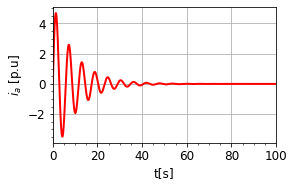

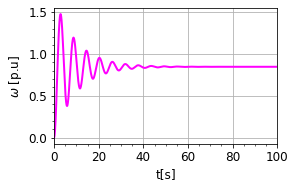

In [136]:
plt.figure(210, figsize = (4,2.5))
plt.rc('font', size =12)
plt.plot(yia[0], yia[1], c = 'r', lw =2)
plt.xlim(yia[0][0], yia[0][-1])
plt.minorticks_on()
plt.grid()
plt.xlabel('t[s]')
plt.ylabel('$i_a$ [p.u]')
plt.figure(212, figsize = (4,2.5))
plt.plot(yws[0], yws[1], c ='magenta', lw =2)
plt.xlim(yws[0][0], yws[0][-1])
plt.minorticks_on()
plt.grid()
plt.xlabel('t[s]')
plt.ylabel('$\omega$ [p.u]')
plt.show()

In [137]:
#function which calculates the derivatives of the system equation
#dx/dt
#X is vector consisting of 2 state variables X[0] = ia, X[1] = w
def DCModel(X,t,paramsdc):
    x0 = X[0] #ia
    x1 = X[1] #w
    
    psf,ml,va, ta,tj = paramsdc
    me = x0*psf
    # diffs - right hand side of the differential equation that describe the system
    dx0dt = -(1/ta)*x0 - x1*psf/(la) + va/(la)
    dx1dt = (me - ml)/tj
    return [dx0dt,dx1dt]

### Voltage step response of the DC machine
In this part we will apply a voltage step and simulate the dynamics to see how the speed and the current change. We will also create a load torque step, which acts as a disturbance, on the system and see how the response is on the speed

In [138]:
tstart = 0
tend = 0.2*wr
# tend = 100.0
tinc = 0.01 #Time step - critical parameter - determines the accuracy of simuation. 
ts = np.arange(tstart,tend,tinc)

#some arrays to store the resukt
sol = np.zeros((len(ts),2)) #array that has of lenth equal to time series x 2 state variables-  X 
iaref = np.zeros(len(ts))  #array of length equal to time series 
ia = np.zeros(len(ts))
w = np.zeros(len(ts))
eia = np.zeros(len(ts))
# Initial conditions
w0 = 0.0 
ml = np.zeros(len(ts))
v = np.zeros(len(ts))
#creating a voltage steps or voltage signals 

for ii,tn in enumerate(ts):
    if (tn>10):
        v[ii] = 1.0            #voltage remains same
        ml[ii] = 0.0           #load torque step 
    elif (tn >=0.15):
        v[ii] = 0.0           #voltage step 
    else:
        v[ii] = 0              #initial voltage
        
psf = 1.0 #field 
# kp = 5e-1
# Ti = 3.0e2
# uplim = 1.0
# dwnlim = -1.0
# Kparams = [kp,Ti,uplim,dwnlim]

In [139]:
# set inital conditions
x0 = [0,w0] #Initial conditions of 2 variable {ia=0,w=0}
# Starting the simuklation 
for ii,tn in enumerate(ts):
    ra,la,Ta,Tj = mach_paraDC(mach_DCM1)
    paramsdc = [1.0,ml[ii],v[ii],Ta,Tj]
    solx = odeint(DCModel, x0, [0,tinc], args = (paramsdc,),)  #Calling Odeint function from Scipy
    sol[ii] = solx[-1]   #Saving last result in the solution array
    x0 = solx[-1]        #re-initializing for next iteration 
    ia[ii] = sol[ii][0]  #saving results in array
    w[ii] = sol[ii][1]   #saving results in array
    
# Torque calculation
me = psf*ia

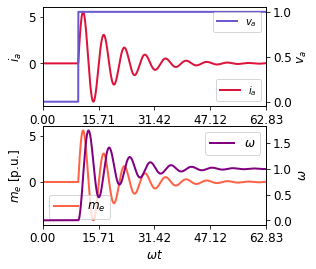

In [140]:
plt.figure(207, figsize=(4,4))
plt.rc('font',size = 12)
ax1=plt.subplot(2,1,1)
ax1.plot(ts,ia, 'crimson', lw =2, label = r"$i_a$")
ax1.set_ylabel('$i_a$')
# ax1.set_yticks(np.linspace(-0.5,0.5,5))
ax2 = ax1.twinx()
ax2.plot(ts,v, 'slateblue', lw =2, label = r"$v_a$")
ax2.set_ylabel('$v_a$')
ax2.set_xticks(np.linspace(tstart, tend,5))
ax2.set_xlim(tstart,tend)
ax1.legend(loc= "lower right", fontsize = 10)
ax2.legend(loc= "upper right", fontsize = 10)
# ax2.set_yticks(np.linspace(-0.02,0.02,5))

ax3 = plt.subplot(2,1,2)
ax3.plot(ts,me, 'tomato', lw =2, label = '$m_e$')
ax3.set_ylabel('$m_e$ [p.u.]')
ax4 = ax3.twinx()
ax4.plot(ts,w, 'purple', lw =2, label = "$\omega$")
ax4.set_ylabel('$\omega$')
ax4.set_xticks(np.linspace(tstart, tend,5))
ax3.set_xlim(tstart,tend)
ax3.set_xlabel('$\omega t$')
ax3.legend(loc = 'lower left')
ax4.legend(loc = 'upper right')
# plt.savefig(dirfig2 + 'Voltagestepresponse.pdf', bbox_inches = 'tight', transparent = True)
plt.show()

## Machine with $T_m > 4T_a$

In [141]:
sol = np.zeros((len(ts),2))
iaref = np.zeros(len(ts))
ia = np.zeros(len(ts))
w = np.zeros(len(ts))
eia = np.zeros(len(ts))
w0 = 0.0
ml = np.zeros(len(ts))
v = np.zeros(len(ts))

for ii,tn in  enumerate(ts):
    if (tn > 50):
        v[ii] = -1.0            #voltage remains same
        ml[ii] = 0.0           #load torque step 
    elif (tn >=0.15):
        v[ii] = 1.0           #voltage step 
    else:
        v[ii] = 0              #initial voltage
        
psf = 1.0

In [142]:

x0 = [0,w0]
for ii, tn in enumerate(ts):
    ra,Ta,Tj = mach_paraDC2(mach_DCnew)
    paramsdc = [psf,ml[ii],v[ii],Ta,Tj]
    solx = odeint(DCModel, x0, [0,tinc], args = (paramsdc,),)  #Calling Odeint function from Scipy
    sol[ii] = solx[-1]   #Saving last result in the solution array
    x0 = solx[-1]        #re-initializing for next iteration 
    ia[ii] = sol[ii][0]  #saving results in array
    w[ii] = sol[ii][1]   #saving results in array
    
# Torque calculation
me = psf*ia

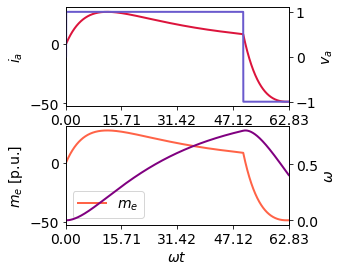

In [143]:
plt.figure(201, figsize=(4,4))
plt.rc('font',size = 14)
ax1=plt.subplot(2,1,1)
ax1.plot(ts,ia, 'crimson', lw =2)
ax1.set_ylabel('$i_a$')
# ax1.set_yticks(np.linspace(-0.5,0.5,5))
ax2 = ax1.twinx()
ax2.plot(ts,v, 'slateblue', lw =2)
ax2.set_ylabel('$v_a$')
ax2.set_xticks(np.linspace(tstart, tend,5))
ax2.set_xlim(tstart,tend)
# ax2.set_yticks(np.linspace(-0.02,0.02,5))

ax3 = plt.subplot(2,1,2)
ax3.plot(ts,me, 'tomato', lw =2, label = '$m_e$')
ax3.set_ylabel('$m_e$ [p.u.]')
ax4 = ax3.twinx()
ax4.plot(ts,w, 'purple', lw =2)
ax4.set_ylabel('$\omega$')
ax4.set_xticks(np.linspace(tstart, tend,5))
ax3.set_xlim(tstart,tend)
ax3.set_xlabel('$\omega t$')
ax3.legend(loc = 'lower left')
# pl.savefig('VoltagestepresponseDCM4ta.pdf', bbox_inches = 'tight', transparent = True)
plt.show()

## Controller setting of DC motor

In [144]:
ra,la,ta,tm = mach_paraDC(mach_DCM4ta)
# ra,la,ta,tm = mach_paraDC(mach_DCnew)
tj = tm/ra
# ra,la,ta,tm = mach_paraDC(mach_DCss)
# ra,la,ta,tm = mach_paraDC(mach_DCM1)
#Transfer functions
numiava = [tj, 0]
deniav = [tm*ta, tm, 1 ]
numwa = [1]

#### Poles of the transfer functions 

In [147]:
zx,px,kx = signal.tf2zpk(numiava,deniav)
print('zeros of the system', zx)
print('poles of the system', px)
print('gain of the system', kx)
print(px)

zeros of the system [0.]
poles of the system [-0.2029812 -0.0009023]
gain of the system 6.934812760055479
[-0.2029812 -0.0009023]


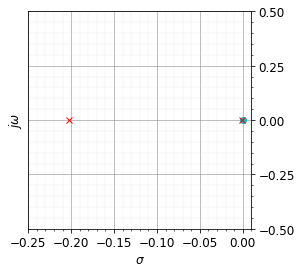

In [148]:
plt.figure(302,figsize = (4,4))
plt.rc('font', size =12)
ax =plt.subplot(111)
ax.yaxis.tick_right()

ax.plot(zx.real,zx.imag,'co')
ax.plot(px.real,px.imag, 'rx')

ax.set_xlim(-0.25,xmax=0.01)
ax.minorticks_on()
ax.set_yticks(np.linspace(-0.5,0.5,5))
# pl.axhline(0, c = 'k')
plt.xlabel('$\sigma$')
ax.set_ylabel('$j\omega$')
plt.grid(True, which = 'major', lw =0.5, c = 'grey')
plt.grid(True, which = 'minor', lw =0.2, c = 'lightgrey')
# pl.text(ppx[1][0]-0.05,-0.15, "$s_1 = ${0:0.3f}".format(ppx[1][0]))
# pl.text(ppx[1][1]-0.05, 0.15, "$s_2 = ${0:0.3f}".format(ppx[1][1]))

# plt.savefig("poleplotDC4ta.pdf", bbox_inches = 'tight', transparent = True)
plt.show()

In [149]:
from sympy import init_printing
init_printing()

In [150]:
Ts = -1/px[0]
Tl = -1/px[1]

print(Ts,Tl)

4.92656467193145 1108.2825650676057


In [151]:
#Transfer function ia/va Giv
Giv = signal.lti(numiava, deniav)
DGiv = lti_to_sympy(Giv)
print(Giv.num)
print(Giv.den)
print(DGiv)

[6.93481276 0.        ]
[1.00000000e+00 2.03883495e-01 1.83149320e-04]
6.93481276005548*s/(1.0*s**2 + 0.203883495145631*s + 0.000183149320014412)


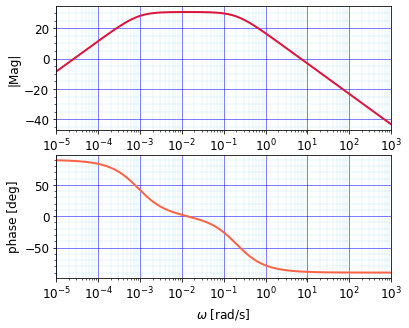

In [152]:
#Open loop transfer function 

# w = np.arange(0.001,10e5,0.1)
w = np.logspace(-5,3,1000)
wiv,magiv, phaseiv = signal.bode(Giv,w)
plt.figure(401,figsize = (6,5))
plt.rc('font', size = 12)
plt.subplot(2,1,1)
plt.semilogx(w,magiv, 'crimson', lw =2)
plt.minorticks_on()
plt.grid(True, which = 'major', lw =0.5, c = 'blue')
plt.grid(True, which = 'minor', lw =0.2, c = 'skyblue')
plt.xlim(w[0],w[-1])
plt.ylabel("|Mag|")

plt.subplot(2,1,2)
plt.semilogx(w,phaseiv, 'tomato', lw =2)
plt.minorticks_on()
plt.grid(True, which = 'major', lw =0.5, c = 'blue')
plt.grid(True, which = 'minor', lw =0.2, c = 'skyblue')
plt.xlabel('$\omega$ [rad/s]')
plt.xlim(w[0],w[-1])
plt.ylabel("phase [deg]")
# plt.savefig(dirfig2+"CurrentForwardBode.pdf", bbox_inches = 'tight', transparent = True)
plt.show()

In [153]:
#Current transfer function 
Giv
zx,px,kx = signal.tf2zpk(numiava,deniav)
print('zeros of the system', zx)
print('poles of the system', px)
print('gain of the system', kx)
print(-px[0])

zeros of the system [0.]
poles of the system [-0.2029812 -0.0009023]
gain of the system 6.934812760055479
0.2029811981759598


### Setting PI controller using Magnitude Optimum

In [154]:
#Pi Transfer function
Ti = -px[0]
kpa = Ti/(2*kx*(-px[1]))
numPIpoly = np.array([kpa*Ti,kpa])
denPI = np.array([Ti,0])
numPI = numPIpoly
GPIc = signal.lti(numPI,denPI)

In [155]:
DGPIc = lti_to_sympy(GPIc)
print(DGPIc)
#Open loop TF or Feedforward TF
DGOIV = DGPIc*DGiv
#Closed loop system
DGCiv = DGOIV/(1 + DGOIV)
#Feedforward TF
Goiv = sympy_to_lti(DGOIV)
#Closed loop TF
Gciv = sympy_to_lti(DGCiv)
print(DGOIV)
xpr = DGOIV
num, den = sy.simplify(xpr).as_numer_denom()  # expressions
p_num_den = sy.poly(num, s), sy.poly(den, s)  # polynomials
print("DGCiv")
print(sy.simplify(DGCiv))

16.2196537064938 + 79.9071729413744/s
6.93481276005548*s*(16.2196537064938 + 79.9071729413744/s)/(1.0*s**2 + 0.203883495145631*s + 0.000183149320014412)
DGCiv
(112.480261487474*s + 554.141282533803)/(1.0*s**2 + 112.68414498262*s + 554.141465683123)


In [156]:
zoiv,poiv,koiv = signal.tf2zpk(Goiv.num, Goiv.den)
print(poiv)
print(zoiv)
zciv,pciv,kciv = signal.tf2zpk(Gciv.num, Gciv.den)
print(pciv)
print(zciv)

[-0.2029812 -0.0009023]
[-4.92656467]
[-107.530818     -5.15332698]
[-4.92656467]


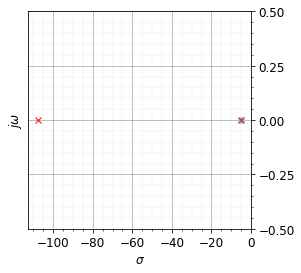

In [157]:
plt.figure(302,figsize = (4,4))
plt.rc('font', size =12)
ax =plt.subplot(111)
ax.yaxis.tick_right()
# ax.plot(ppx[1][0].real,ppx[1][0].imag, 'rx')
# ax.plot(ppx[1][1].real,ppx[1][1].imag, 'bx')
# ax.plot(ppx[1].real,ppx[1].imag, 'rx')
# ax.plot(ppx[0].real,ppx[0].imag,'bo')
ax.plot(zciv.real,zciv.imag,'o', c = 'skyblue')
ax.plot(pciv.real,pciv.imag,'x', c = 'red')


# ax.plot(poiv.real,poiv.imag,'x', c = 'darkred')
# ax.plot(zoiv.real,zoiv.imag,'o', c = 'navy')

# ax.set_xlim(-0.25,xmax=0.01)
ax.minorticks_on()
ax.set_yticks(np.linspace(-0.5,0.5,5))
# pl.axhline(0, c = 'k')
plt.xlabel('$\sigma$')
ax.set_ylabel('$j\omega$')
plt.grid(True, which = 'major', lw =0.5, c = 'grey')
plt.grid(True, which = 'minor', lw =0.2, c = 'lightgrey')
# pl.text(ppx[1][0]-0.05,-0.15, "$s_1 = ${0:0.3f}".format(ppx[1][0]))
# pl.text(ppx[1][1]-0.05, 0.15, "$s_2 = ${0:0.3f}".format(ppx[1][1]))

# plt.savefig("poleplotDC4ta.pdf", bbox_inches = 'tight', transparent = True)
plt.show()

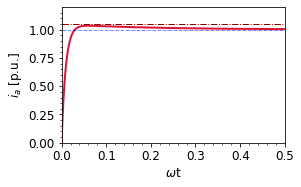

In [158]:
#Step response
yciv = signal.lti.step(Gciv, T = np.arange(0,0.5,0.001))
plt.figure(301,figsize = (4,2.5))
plt.rc('font', size =12)
plt.plot(yciv[0],yciv[1], 'crimson', lw =2)
plt.minorticks_on()
# plt.grid(True, which = 'major', lw =0.5, c = 'blue')
# plt.grid(True, which = 'minor', lw =0.2, c = 'skyblue')
plt.axhline(1.0,ls = "-.", c = 'b', lw = 0.5)
# plt.xticks(np.linspace(0,1.6,5))
plt.xlim(0,0.5)
plt.ylim(0,1.2)
plt.xlabel('$\omega$t')
plt.ylabel(r"$i_a$ [p.u.]")
plt.axhline(1.05, ls = "-.", c = "darkred", lw = 1.0)
# plt.savefig(dirfig2+"StepResponseInnerCurrent.pdf", bbox_inches = 'tight', transparent = True)

plt.show()

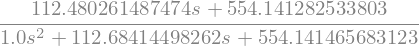

In [159]:
DGciv = lti_to_sympy(Gciv)
display(DGciv)
K1 = Gciv.num
Den = Gciv.den
Te = 1/Den[1]
ke = K1[0]/Den[1]

In [160]:
#equivalent closed loop tranfer function
tnum = [ke] #numerator
tden = [Te,1] #denominator
print("Te= {0:3.5f}, ke = {1:3.5f}".format(Te,ke))
TGciv = signal.lti(tnum,tden)
#Speed part 1/sTj
Gs = signal.lti(1,[tj,0])
Tdgciv = lti_to_sympy(TGciv)
TGs = lti_to_sympy(Gs)
DGsf = Tdgciv*TGs
Gsf = sympy_to_lti(DGsf)
# display(DGs)
print(tj,Te,ke)
print(Gsf.num)
print(Gsf.den)

Te= 0.00887, ke = 0.99819
37864.256113589705 0.008874362938585872 0.9981906638668869
[0.00297062]
[  1.         112.68414498   0.        ]


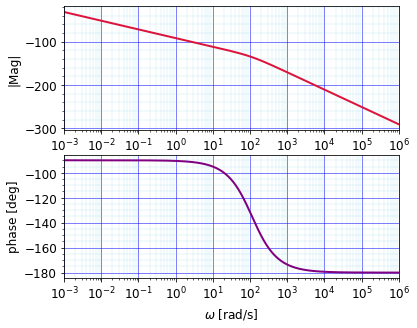

In [161]:
w2 = np.logspace(-3,6,1000)
ws2, mags,phases = signal.bode(Gsf,w2)

plt.figure(403,figsize = (6,5))
plt.rc('font', size = 12)
plt.subplot(2,1,1)
plt.semilogx(ws2,mags, 'crimson', lw =2)
plt.minorticks_on()
plt.grid(True, which = 'major', lw =0.5, c = 'blue')
plt.grid(True, which = 'minor', lw =0.2, c = 'skyblue')
plt.xlim(w2[0],w2[-1])
plt.ylabel("|Mag|")

plt.subplot(2,1,2)
plt.semilogx(ws2,phases, 'purple', lw =2)
plt.minorticks_on()
plt.grid(True, which = 'major', lw =0.5, c = 'blue')
plt.grid(True, which = 'minor', lw =0.2, c = 'skyblue')
plt.xlabel('$\omega$ [rad/s]')
plt.ylabel("phase [deg]")
plt.xlim(w2[0],w2[-1])
# plt.savefig(dirfig2+"SpeedOpenLoopBode.pdf", bbox_inches= 'tight', transparent = True)
plt.show()

## Symmetrical Optimum

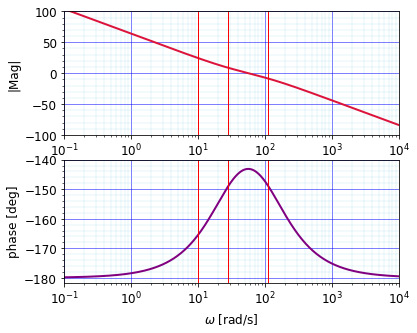

In [162]:
#Speed open loop transfer function 
a = 2.0
kps = tj/(a*ke*Te)
b1pi = Te*a**2 
numpi = [b1pi*kps,1*kps]
#Transfer function of Symmetrical optimum speed PI
GPi = signal.lti(numpi,[b1pi,0])
#For display
DGPi = lti_to_sympy(GPi)
#Multiply the sympy transfer function 
DGsos = DGsf*DGPi
#in Sympy
# display(DGsos)
#Convert back lti from sympy
Gsos = sympy_to_lti(DGsos)

#Symmetrical optimum bode plot

ws = np.logspace(-5,6,1000)
wso, magso,phaseso = signal.bode(Gsos,ws)
wlow = 1e-1
whigh = 10000
plt.figure(401,figsize = (6,5))
plt.rc('font', size = 12)
plt.subplot(2,1,1)
plt.semilogx(wso,magso, 'crimson', lw =2)
plt.axvline(10, c= 'r', lw = 1)
plt.axvline(1/(Te*a**2), c = 'r', lw =1)
plt.axvline(1/Te, c = 'r', lw = 1)
plt.yticks(np.linspace(-100,100,5))
plt.ylim(-100,100)
plt.minorticks_on()
plt.grid(True, which = 'major', lw =0.5, c = 'blue')
plt.grid(True, which = 'minor', lw =0.2, c = 'skyblue')
plt.xlim(wlow,whigh)
plt.ylabel("|Mag|")

plt.subplot(2,1,2)
plt.semilogx(wso,phaseso, 'purple', lw =2)
plt.minorticks_on()
plt.axvline(10, c = 'r', lw = 1)
plt.grid(True, which = 'major', lw =0.5, c = 'blue')
plt.grid(True, which = 'minor', lw =0.2, c = 'skyblue')
plt.xlabel('$\omega$ [rad/s]')
plt.ylabel("phase [deg]")
plt.axvline(10, c= 'r', lw = 1)
plt.axvline(1/(Te*a**2), c = 'r', lw =1)
plt.axvline(1/Te, c = 'r', lw = 1)
# pl.xlim(wso[0],wso[-1])
plt.xlim(wlow,whigh)
plt.yticks(np.linspace(-180,-140,5))
# plt.savefig(dirfig2 +"SpeedSymmetricalPIBode.pdf", bbox_inches= 'tight', transparent = True)
plt.show()


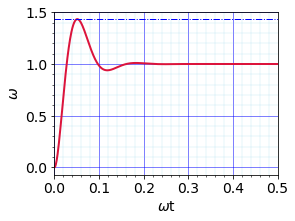

In [163]:
#Step response Symmetrical optimum
#For any arithmetic operation on transfer function use the tf in sympy
DGcos = DGsos/(1+DGsos)
#Then convert back to lti
Gcos = sympy_to_lti(DGcos)
#Step response of the closed loop transfer function 
yss = signal.lti.step(Gcos, T = np.arange(0,0.5,0.001))
#plot
plt.figure(301,figsize = (4,3))
plt.rc('font', size =14)
plt.plot(yss[0],yss[1], 'crimson', lw =2)
plt.minorticks_on()
plt.grid(True, which = 'major', lw =0.5, c = 'blue')
plt.grid(True, which = 'minor', lw =0.2, c = 'skyblue')
# pl.xticks(np.linspace(0,yss[0][-1],5))
plt.xlim(0,0.5)
plt.axhline(1.434, ls = "-.",c = 'b', lw = 1.0)
plt.xlabel('$\omega$t')
plt.ylabel('$\omega$')
# plt.savefig(dirfig2+"StepResponseSpeedSymmOpt.pdf", bbox_inches = 'tight', transparent = True)

plt.show()

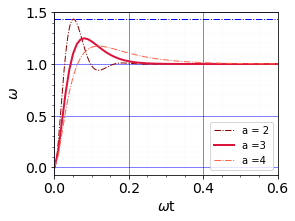

In [164]:
#Changing value of a

#Speed open loop transfer function 
a = 3.0
kps = tj/(a*ke*Te)
b1pi = Te*a**2 
numpi2 = [b1pi*kps,1*kps]
GPi2 = signal.TransferFunction(numpi2,[b1pi,0])
DGPi2 = lti_to_sympy(GPi2)
DGsos2 = DGsf*DGPi2
# display(DGsos)
Gsos2 = sympy_to_lti(DGsos2)

a = 4.0
kps = tj/(a*ke*Te)
b1pi3 = Te*a**2 
numpi3 = [b1pi3*kps,1*kps]
GPi3 = signal.TransferFunction(numpi3,[b1pi3,0])
DGPi3 = lti_to_sympy(GPi3)
DGsos3 = DGsf*DGPi3
# display(DGsos)
Gsos3 = sympy_to_lti(DGsos3)

#Step response
#Step response Symmetrical optimum
DGcos2 = DGsos2/(1+DGsos2)
Gcos2 = sympy_to_lti(DGcos2)
yss2 = signal.lti.step(Gcos2, T = ts)

DGcos3 = DGsos3/(1+DGsos3)
Gcos3 = sympy_to_lti(DGcos3)
yss3 = signal.lti.step(Gcos3, T = ts)


plt.figure(302,figsize = (4,3))
plt.rc('font', size =14)
plt.plot(yss[0],yss[1],'-.', c='darkred', lw =1, label = 'a = 2')
plt.plot(yss2[0],yss2[1], 'crimson', lw =2, label = 'a =3')
plt.plot(yss3[0],yss3[1],"-.", c=  'tomato', lw =1, label = 'a =4')
plt.minorticks_on()
plt.grid(True, which = 'major', lw =0.5, c = 'blue')
plt.grid(True, which = 'minor', lw =0.05, c = 'skyblue')
# plt.xticks(np.linspace(0,yss[0][-1],5))
plt.xlim(0,0.6)
plt.axhline(1.434,ls = "-.", c = 'b', lw = 1.0)

plt.xlabel('$\omega$t')
plt.ylabel('$\omega$')
plt.legend(loc = 'lower right', fontsize = 10)
# plt.savefig(dirfig2+"StepResponseSpeedSymmOpta3.pdf", bbox_inches = 'tight', transparent = True)
plt.show()

## Time domain Simulation

In [165]:
def PIcon(xe,y,dt,Kparams):
    """Pass on xe = [error[k], error[k-1]]
       Pass on y  = [y[k-1]]
       Pass on Parameters = [kp, Ti]
    """
    kp, Ti = Kparams
    xeo = xe[1]
    xen = xe[0]
#     print(xeo,xen,y,kp,Ti)
    y1 = y
    y2 = y1 + kp*(xen - xeo) + (kp/Ti)*(xen)*dt
    return y2

def PIconwithLim(xe,y,dt,Kparams):
    """Pass on xe = [error[k], error[k-1]]
       Pass on y  = [y[k-1]]
       Pass on Parameters = [kp, Ti]
    """
    kp, Ti, uplim, dwnlim = Kparams
    xeo = xe[1]
    xen = xe[0]
#     print(xeo,xen,y,kp,Ti)
#     y2 = y1 + kp*(xen - xeo) + (kp/Ti)*(xen)
#     print(xeo,xen,y,kp,Ti)
    y1 = y
    yx = y1 + kp*(xen - xeo) + (kp/Ti)*(xen)*dt
    if (yx > uplim):
        yx = uplim
    elif (yx < dwnlim):
        yx = dwnlim
    y2 = yx
    return y2

In [166]:
# Select the machine
# ra, la, ta, tm = mach_paraDC(mach_DC)
#
# ra,la,ta,txx = mach_paraDC(mach_DCM4ta)
ra,ta,tj = mach_paraDC2(mach_DCnew)
numiava = [tj, 0]
tm = tj*ra
deniav = [tm*ta, tm, 1 ]
numwa = [1]
print(ta,4*ta,tm,tj)
Giv = signal.lti(numiava, deniav)
zx, px,kx = signal.tf2zpk(Giv.num,Giv.den)
print("poles of the Giv",px)
print(kx)

Tl = -px[0]
Ts = -px[1]
print("Tl =",Tl)
print("Ts =",Ts)
Ti = Tl
kpi = Tl/(2*kx*Ts)

4.904761904761905 19.61904761904762 1113.2091297395373 37864.256113589705
poles of the Giv [-0.2029812 -0.0009023]
6.934812760055479
Tl = 0.2029811981759598
Ts = 0.0009022969696712675


In [167]:
# Setting the speed loop parameters
GPIc = signal.lti([kpi*Ti,kpi],[Ti,0])
DGPIc = lti_to_sympy(GPIc)
DGiv = lti_to_sympy(Giv)
DGoiv = DGiv*DGPIc
Goiv = sympy_to_lti(DGoiv)
DGciv = DGoiv/(1 + DGoiv)
Gciv = sympy_to_lti(DGciv)
numciv = Gciv.num
denciv = Gciv.den
print(numciv)
print(denciv)
Te = 1/denciv[1]
ke = numciv[0]/denciv[1]
print(Te,ke)
a = 3.0
kpw = tj/(a*ke*Te)
Tiw = Te*a**2
print(Tiw)
print(kpw)

[112.48026149 554.14128253]
[  1.         112.68414498 554.14146568]
0.008874362938585872 0.9981906638668869
0.07986926644727285
1424811.7385490395


In [168]:
tstart = 0
tend = 0.5*wr
# tend = 100.0
tinc = 0.01
ts = np.arange(tstart,tend,tinc)



sol = np.zeros((len(ts),2))
iaref = np.zeros(len(ts))
ia = np.zeros(len(ts))
w = np.zeros(len(ts))
eia = np.zeros(len(ts))
w0 = 0.0
ml = np.zeros(len(ts))
v = np.zeros(len(ts))
for ii,tn in enumerate(ts):
    if (tn>50):
        iaref[ii] = -0.2
        ml[ii] = 0.0
    elif (tn>=0.05):
        iaref[ii] = 0.5
    else:
        iaref[ii] = 0
        
psf = 1.0
#Magnitude optimum for inner current PI-controller

uplim = 1.0
dwnlim = -1.0
KparamsL = [kpi,Ti,uplim,dwnlim]
Kparams = [kpi,Ti]

In [169]:
x0 = [0,w0]
for ii,tn in enumerate(ts):
    if (ii > 0): 
        eia[ii] = iaref[ii] - ia[ii-1]
        PIea = [eia[ii], eia[ii-1]]
#         v[ii] = PIconwithLim(PIea,v[ii-1],tinc,KparamsL)
        v[ii] = PIcon(PIea,v[ii-1],tinc,Kparams)
    ra,ta,tj = mach_paraDC2(mach_DCnew)
    paramsdc = [psf,ml[ii],v[ii],ta,tj]
    solx = odeint(DCModel, x0, [0,ts[1]], args = (paramsdc,),)
    sol[ii] = solx[-1]
    x0 = solx[-1]
    ia[ii] = sol[ii][0]
    w[ii] = sol[ii][1]
    

me = psf*ia


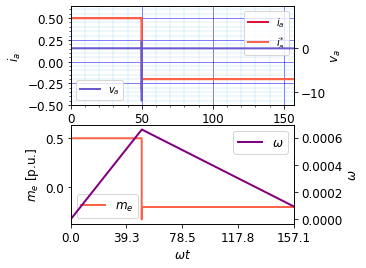

In [170]:
plt.figure(202, figsize=(4,4))
plt.rc('font',size = 12)
ax1=plt.subplot(2,1,1)
ax1.plot(ts,ia, 'crimson', lw =2, label = "$i_a$")
ax1.plot(ts,iaref,'tomato',lw=2, label = "$i^{*}_{a}$")
# ax1.set_yticks(np.linspace(-12,12,5))
# ax1.set_ylim(-12,12)
ax1.set_yticks(np.linspace(-0.5,0.5,5))
ax2 = ax1.twinx()
ax2.plot(ts,v, 'slateblue', lw =2, label = "$v_a$")
ax2.set_xlim(tstart,tend)
ax2.set_ylabel('$v_a$')
ax1.set_ylabel('$i_a$')
ax1.minorticks_on()
ax1.grid(which = 'minor',c = 'skyblue', lw = 0.3)
ax1.grid(which = 'major',c = 'blue', lw = 0.5)
ax1.legend(loc = "upper right", fontsize = 10)
ax2.legend(loc = "lower left", fontsize = 10)
# ax2.set_yticks(np.linspace(-8,8.0,5))
# ax2.set_yticks(np.linspace(-0.02,0.02,5))

ax3 = plt.subplot(2,1,2)
ax3.plot(ts,me, 'tomato', lw =2, label = '$m_e$')
ax3.set_ylabel('$m_e$ [p.u.]')
ax4 = ax3.twinx()
ax4.plot(ts,w, 'purple', lw =2, label = "$\omega$")
ax4.set_ylabel('$\omega$')
ax4.set_xticks(np.linspace(tstart, tend,5))
ax3.set_xlim(tstart,tend)
ax3.set_xlabel('$\omega t$')
ax3.legend(loc = 'lower left')
ax4.legend(loc = "upper right")
# plt.savefig(dirfig2 + "StepresponseCurrentloopwithPIlim.pdf", bbox_inches = 'tight', transparent = True)
plt.show()

## Speed Control of DC motor

In [174]:
tend = 4*wr
tinc = 0.01
ts = np.arange(tstart,tend,tinc)

sol = np.zeros((len(ts),2))
iaref = np.zeros(len(ts))
ia = np.zeros(len(ts))
w = np.zeros(len(ts))
eia = np.zeros(len(ts))
ew = np.zeros(len(ts))
wref = np.zeros(len(ts))
w0 = 0.0
ml = np.zeros(len(ts))
v = np.zeros(len(ts))
for ii in range(len(ts)):
    if (ts[ii]>2.5*wr):
        wref[ii] = -0.2
        ml[ii] = 0.3
    elif (ts[ii]>=0.1*wr):
        wref[ii] = 0.5
    else:
        wref[ii] = 0
        
psf = 0.9
kp = 5.0e-1
Ti = 3.0e2
uplim = 1.0
dwnlim = -1.0
KparamsL = [kp,Ti,uplim,dwnlim]
Kparams = [kp,Ti]

kps = 5550
Tiw = 1e3
uplimw = 1.0
dwnlimw = -1.0
KparamswL = [kpw,Tiw,uplimw,dwnlimw]
Kparamsw = [kps,Tiw]
print(kps)
print(Te)
print(b1pi)
print(tj)

5550
0.008874362938585872
0.07986926644727285
37864.256113589705


In [175]:
x0 = [0,w0]
for ii,tn in enumerate(ts):
    if (ii > 0):
        ew[ii] = wref[ii] - w[[ii-1]]
        PIw = [ew[ii], ew[ii-1]]
#         iaref[ii] = PIconwithLim(PIw, iaref[ii-1], tinc, KparamswL)
        iaref[ii] = PIcon(PIw, iaref[ii-1], tinc, Kparamsw)
        eia[ii] = iaref[ii] - ia[ii-1]
        PIea = [eia[ii], eia[ii-1]]
#         v[ii] = PIconwithLim(PIea,v[ii-1],tinc,KparamsL)
        v[ii] = PIcon(PIea,v[ii-1],tinc,Kparams)
    ra,la,ta,tm = mach_paraDC(mach_DCM4ta)
    paramsdc = [psf,ml[ii],v[ii],ta,tm]
    solx = odeint(DCModel, x0, [0,tinc], args = (paramsdc,),)
    sol[ii] = solx[-1]
    x0 = solx[-1]
    ia[ii] = sol[ii][0]
    w[ii] = sol[ii][1]
    

me = psf*ia

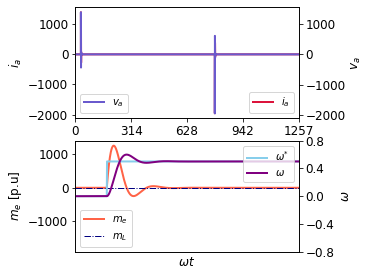

In [176]:
plt.figure(203, figsize=(4,4.5))
plt.rc('font',size = 12)
ax1=plt.subplot(2,1,1)
ax1.plot(ts,ia, 'crimson', lw =2, label = "$i_a$")
# ax1.plot(ts,iaref, 'tomato', lw =2, label = "$i^{*}_a$")
# ax1.set_yticks(np.linspace(-12,12,5))
# ax1.set_ylim(-20,20)
# ax1.set_yticks(np.linspace(-0.5,0.5,5))
ax2 = ax1.twinx()
ax2.plot(ts,v, 'slateblue', lw =2, label = "$v_a$")
ax2.set_xticks(np.linspace(tstart, tend,5))
ax2.set_xlim(tstart,tend)
ax2.set_ylabel('$v_a$')
ax1.set_ylabel('$i_a$')
ax1.legend(loc = 'lower right', fontsize =10)
plt.legend(loc = 'lower left', fontsize =10)
# ax2.set_yticks(np.linspace(-8,8.0,5))

ax3 = plt.subplot(2,1,2)
ax3.plot(ts,me, 'tomato', lw =2, label = '$m_e$')
ax3.plot(ts,ml,ls="-.",c = 'navy' ,lw =1, label = '$m_L$')
# ax3.set_yticks(np.linspace(-12,12,5))
# ax3.set_ylim(-20,20)
ax3.set_ylabel('$m_e$ [p.u]')
# ax3.plot(ts,ml, 'peru', lw =2)
ax4 = ax3.twinx()

ax4.plot(ts,wref,'skyblue', lw =2, label = "$\omega^{*}$")
ax4.plot(ts,w, 'purple', lw =2, label = "$\omega$")
ax4.set_yticks(np.linspace(-0.8,0.8,5))
ax4.set_ylim(-0.8,0.8)
ax4.set_ylabel('$\omega$')
ax4.set_xticks(np.linspace(tstart, tend,5))
ax3.set_xlim(30,40)
ax3.set_xlabel('$\omega t$')
ax3.legend(loc = 'lower left', fontsize = 10)
ax4.legend(loc = 'upper right', fontsize = 10)
# plt.savefig(dirfig2 + "StepresponseSpeedloopwithPIlim.pdf", bbox_inches = 'tight', transparent = True)
plt.show()